**Homework 1**

In [1]:
# This is the first homework of the course. The homework is about the classification of the data set.
import pandas as pd
import numpy as np   

from sklearn import svm
from sklearn.model_selection import train_test_split, cross_val_score, ShuffleSplit, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import *
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.naive_bayes import *
import matplotlib.pyplot as pl
from mlxtend.plotting import plot_confusion_matrix
from mlxtend.evaluate import confusion_matrix

In [2]:
# The import from google.colab is to be used in the google colab environment. However, I runned the code in my local machine.
#from google.colab import drive
#drive.mount('/content/drive')

In [3]:
#In this case I am loading the dataset from the local environment.

#filename= '/content/drive/MyDrive/Machine Learning/Homework 1 Dataset/HW1_datasets_public/dataset1.csv'
dataset_1 = 'dataset1.csv'
dataset_2 = 'dataset2.csv'

In [4]:
# The load_data function is used to load the dataset. The function returns the input and output data. 
# The input data is the first column of the dataset and the output data is the second column of the dataset.
# What it does is to read the csv file and convert it into a pandas dataframe. Then it extracts the first and second columns of the dataframe and converts them into numpy arrays.

def load_data(csv_filepath):
    '''
    Load data from a csv file.

    :param csv_filepath: path of the .csv file containing the data to load/extract

    :return X: array of values associated with the inputs of the data contained in the .csv file
    :return Y: array of values associated with the labels of the data contained in the .csv file or None if the file does not contain labels
    '''

    data = pd.read_csv(csv_filepath)

    # Headers' list:
    headers = data.columns # 'x' for inputs, 'y' for labels

    # Extract DataFrames based on the headers:
    x_data = data[headers[0]]

    # Convert an array-like string (e.g., '[0.02, 1.34\n, 2.12, 3.23\n]')
    # into an array of floats (e.g., [0.02, 1.34, 2.12, 3.23]):
    X_data = [[float(feature) for feature in feature_vec.replace('[', '').replace(']', '').split()] for feature_vec in x_data]

    # convert data into numpy arrays
    X = np.array(X_data)

    if len(headers)>1:
        Y_data = data[headers[1]]
        Y = np.array(Y_data)
    else:
        Y = None

    return X, Y




**Loading the datasets**

In [5]:
# Step 1: Load data

print('Loading dataset 1...')
X, Y = load_data(dataset_1)
print('Samples and Features of X' ,X.shape)
#print(Y.shape)
#print(np.unique(Y))
print('Loading dataset 2...')
X2, Y2 = load_data(dataset_2)
print('Samples and Features of X2', X2.shape)
#print(Y2.shape)
#print(np.unique(Y2))

# Step 2: Split the data into training and two different testing sets
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X, Y, test_size=0.2, random_state=63)

X_train3, X_test3, Y_train3, Y_test3 = train_test_split(X2, Y2, test_size=0.2, random_state=42)
X_train4, X_test4, Y_train4, Y_test4 = train_test_split(X2, Y2, test_size=0.2, random_state=63)

print('Data loaded and splitted into training and testing sets.')

Loading dataset 1...
Samples and Features of X (50000, 100)
Loading dataset 2...
Samples and Features of X2 (50000, 1000)
Data loaded and splitted into training and testing sets.


**Creating the Models**

In [6]:
import random

# Model 1 Selection, here we can choose between BernoulliNB, SVM and LogisticRegression
dataset_choice = eval(input('Select the dataset you want to use: 0 for dataset1, 1 for dataset2: '))

if dataset_choice == 0:
  index = random.randint(0, 1)
else:
  index = random.randint(2, 3)
  
# Randomly select X_train and Y_train to be used in fit function
X_train = [X_train1, X_train2, X_train3, X_train4][index]
Y_train = [Y_train1, Y_train2, Y_train3, Y_train4][index]

# Apply feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

print('Creating Bernoulli Model...')
model1 = BernoulliNB()

model1.fit(X_train_scaled, Y_train)
print('Bernoulli Model created by choosing index:', index, 'and using X_train', index+1, 'and Y_train', index+1, 'for fit function')

print('Creating SVM Model...')
model1_1 = svm.SVC(kernel='linear', gamma='scale')

model1_1.fit(X_train_scaled, Y_train)
print('SVM Model created by choosing index:', index, 'and using X_train', index+1, 'and Y_train', index+1, 'for fit function')

print('Creating LogisticRegression Model...')
model1_2 = LogisticRegression(penalty='l1', solver='saga', multi_class='multinomial', max_iter=200, n_jobs=-1, verbose=1, warm_start=True)
model1_2.fit(X_train_scaled, Y_train)
print('LogisticRegression Model created by choosing index:', index, 'and using X_train', index+1, 'and Y_train', index+1, 'for fit function')

Creating Bernoulli Model...
Bernoulli Model created by choosing index: 0 and using X_train 1 and Y_train 1 for fit function
Creating SVM Model...
SVM Model created by choosing index: 0 and using X_train 1 and Y_train 1 for fit function
Creating LogisticRegression Model...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.


max_iter reached after 70 seconds
LogisticRegression Model created by choosing index: 0 and using X_train 1 and Y_train 1 for fit function


c:\Users\andri\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.2min finished


**Evaluating the first batch**

In [11]:
# We calculate the prediction of the model and the classification report is printed.
print('Printing the classification report for the Bernoulli model created using X_test', index+1, 'and Y_test', index+1)
X_test_1 = [X_test1, X_test2, X_test3, X_test4][index]
print('Loading...')
y_pred1 = model1.predict(X_test_1)
Y_test_1 = [Y_test1, Y_test2, Y_test3, Y_test4][index]
print('\nClassification Report\n\n', classification_report(Y_test_1, y_pred1))

print('Printing the classification report for the SVM model created using X_test', index+1, 'and Y_test', index+1)
print('Loading...')
y_pred1_1 = model1_1.predict(X_test_1)
print('\nClassification Report\n\n', classification_report(Y_test_1, y_pred1_1))

print('Printing the classification report for the LogisticRegression model created using X_test', index+1, 'and Y_test', index+1)
print('Loading...')
y_pred1_2 = model1_2.predict(X_test_1)
print('\nClassification Report\n\n', classification_report(Y_test_1, y_pred1_2))

Printing the classification report for the Bernoulli model created using X_test 1 and Y_test 1
Loading...

Classification Report

               precision    recall  f1-score   support

           0       0.99      0.95      0.97       973
           1       0.93      0.97      0.95       979
           2       0.95      0.95      0.95      1030
           3       0.56      1.00      0.71      1023
           4       0.97      0.78      0.87       933
           5       0.98      0.72      0.83      1015
           6       1.00      0.84      0.91       996
           7       1.00      0.90      0.95       994
           8       0.96      0.99      0.98      1017
           9       1.00      0.86      0.92      1040

    accuracy                           0.90     10000
   macro avg       0.93      0.90      0.90     10000
weighted avg       0.93      0.90      0.90     10000

Printing the classification report for the SVM model created using X_test 1 and Y_test 1
Loading...

Classific

Plotting the confusion matrix for Bernoulli...


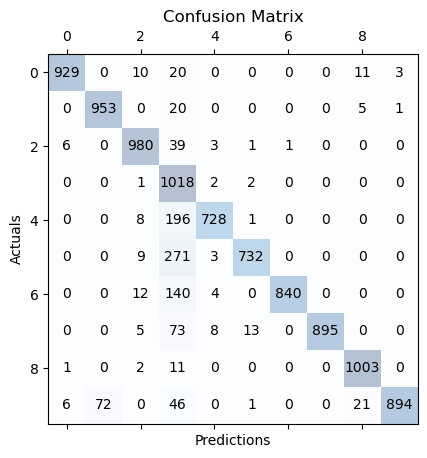

Plotting the confusion matrix for SVM...


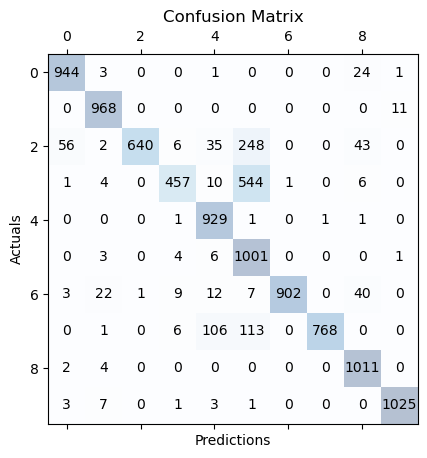

Plotting the confusion matrix for LogisticRegression...


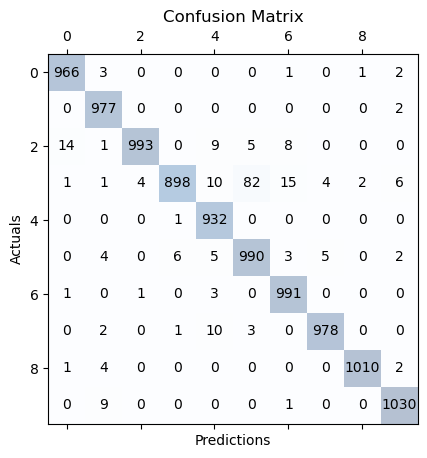

In [12]:
# Here we show the confusion matrix of the model.
print('Plotting the confusion matrix for Bernoulli...')
cm1= confusion_matrix(Y_test_1,y_pred1)
#Plot the confusion matrix
fig1, ax1 = pl.subplots()
ax1.matshow(cm1, cmap=pl.cm.Blues, alpha=0.3)
for i in range(cm1.shape[0]):
    for j in range(cm1.shape[1]):
        ax1.text(x=j, y=i, s=cm1[i, j], va='center', ha='center')
pl.xlabel('Predictions')
pl.ylabel('Actuals')
pl.title('Confusion Matrix')
pl.show()

# Here we show the confusion matrix of the model.
print('Plotting the confusion matrix for SVM...')
cm1= confusion_matrix(Y_test_1,y_pred1_1)
#Plot the confusion matrix
fig1, ax1 = pl.subplots()
ax1.matshow(cm1, cmap=pl.cm.Blues, alpha=0.3)
for i in range(cm1.shape[0]):
    for j in range(cm1.shape[1]):
        ax1.text(x=j, y=i, s=cm1[i, j], va='center', ha='center')
pl.xlabel('Predictions')
pl.ylabel('Actuals')
pl.title('Confusion Matrix')
pl.show()

print('Plotting the confusion matrix for LogisticRegression...')
cm1= confusion_matrix(Y_test_1,y_pred1_2)
#Plot the confusion matrix
fig1, ax1 = pl.subplots()
ax1.matshow(cm1, cmap=pl.cm.Blues, alpha=0.3)
for i in range(cm1.shape[0]):
    for j in range(cm1.shape[1]):
        ax1.text(x=j, y=i, s=cm1[i, j], va='center', ha='center')
pl.xlabel('Predictions')
pl.ylabel('Actuals')
pl.title('Confusion Matrix')
pl.show()


**Second models selection**

In [9]:
# Model 2 Selection uses another model, so that we can compare the results of the two models.

if dataset_choice == 0:
  index_2 = random.randint(0, 1)
  while index_2 == index:
    index_2 = random.randint(0, 1)
else:
  index_2 = random.randint(2, 3)
  while index_2 == index:
    index_2 = random.randint(2, 3)

model2 = MultinomialNB()
print('Creating Multinomial Model...')
# Randomly select X_train2 and Y_train2 to be used in fit function
X_train_2 = [X_train1, X_train2, X_train3, X_train4][index_2]
Y_train_2 = [Y_train1, Y_train2, Y_train3, Y_train4][index_2]
model2.fit(X_train_2, Y_train_2)

print('Multinomial Model created by choosing index:', index_2, 'and using X_train', index_2+1, 'and Y_train', index_2+1, 'for fit function')
print('Creating SVM Model...')

model2_1 = svm.SVC(kernel='poly', gamma='scale')
model2_1.fit(X_train_2, Y_train_2)
print('SVM Model created by choosing index:', index_2, 'and using X_train', index_2+1, 'and Y_train', index_2+1, 'for fit function')

print('Creating LogisticRegression Model...')
model2_2 = LogisticRegression(penalty='l1', solver='saga', multi_class='multinomial', max_iter=1000, n_jobs=-1, verbose=1, warm_start=True)
model2_2.fit(X_train_scaled, Y_train)
print('LogisticRegression Model created by choosing index:', index_2, 'and using X_train', index_2+1, 'and Y_train', index_2+1, 'for fit function')

Creating Multinomial Model...
Multinomial Model created by choosing index: 1 and using X_train 2 and Y_train 2 for fit function
Creating SVM Model...
SVM Model created by choosing index: 1 and using X_train 2 and Y_train 2 for fit function
Creating LogisticRegression Model...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.


max_iter reached after 412 seconds
LogisticRegression Model created by choosing index: 1 and using X_train 2 and Y_train 2 for fit function


c:\Users\andri\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  6.9min finished


**Second Evaluation**

In [13]:
# Again we calculate the prediction of the model and the classification report is printed.
print('Printing the classification report for the MultinomialNB model created using X_test', index_2+1, 'and Y_test', index_2+1)
X_test_2 = [X_test1, X_test2, X_test3, X_test4][index_2]
y_pred2 = model2.predict(X_test_2)
Y_test_2 = [Y_test1, Y_test2, Y_test3, Y_test4][index_2]
print('\nClassification Report\n\n', classification_report(Y_test_2, y_pred2))

y_pred2_1 = model2_1.predict(X_test_2)
print('Printing the classification report for the SVM model created using X_test', index_2+1, 'and Y_test', index_2+1)
print('\nClassification Report\n\n', classification_report(Y_test_2, y_pred2_1))

y_pred2_2 = model2_2.predict(X_test_2)
print('Printing the classification report for the LogisticRegression model created using X_test', index_2+1, 'and Y_test', index_2+1)
print('\nClassification Report\n\n', classification_report(Y_test_2, y_pred2_2))

Printing the classification report for the MultinomialNB model created using X_test 2 and Y_test 2

Classification Report

               precision    recall  f1-score   support

           0       0.99      0.99      0.99       977
           1       0.99      1.00      1.00      1014
           2       0.98      0.98      0.98       996
           3       0.94      0.97      0.95       987
           4       0.99      1.00      0.99      1016
           5       0.99      0.94      0.96       973
           6       0.98      0.99      0.99      1001
           7       0.99      0.99      0.99      1048
           8       0.99      1.00      1.00       993
           9       1.00      0.99      0.99       995

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

Printing the classification report for the SVM model created using X_test 2 and Y_test 2

Classification Report

    

Plotting the confusion matrix for Multinomial...


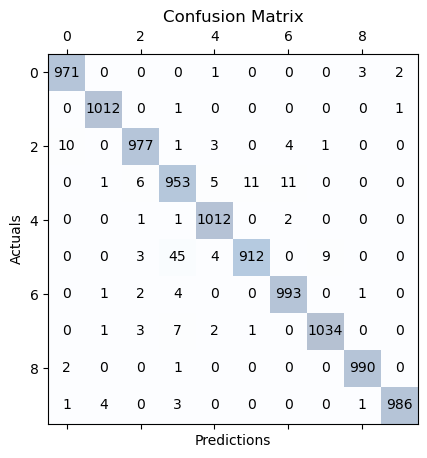

Plotting the confusion matrix for SVM...


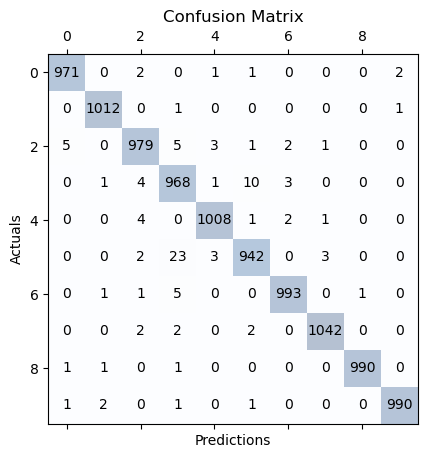

Plotting the confusion matrix for SVM...


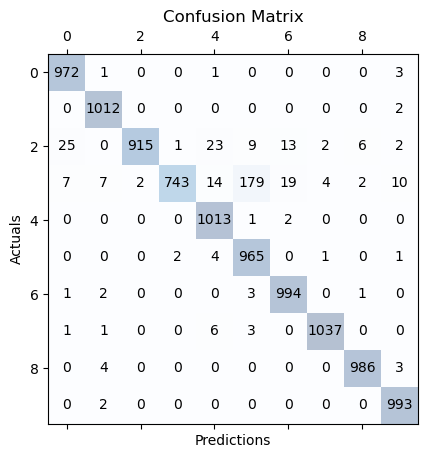

In [14]:
# Here we show the confusion matrix of the model.
print('Plotting the confusion matrix for Multinomial...')
cm1= confusion_matrix(Y_test_2,y_pred2)
#Plot the confusion matrix
fig1, ax1 = pl.subplots()
ax1.matshow(cm1, cmap=pl.cm.Blues, alpha=0.3)
for i in range(cm1.shape[0]):
    for j in range(cm1.shape[1]):
        ax1.text(x=j, y=i, s=cm1[i, j], va='center', ha='center')
pl.xlabel('Predictions')
pl.ylabel('Actuals')
pl.title('Confusion Matrix')
pl.show()

# Here we show the confusion matrix of the model.
print('Plotting the confusion matrix for SVM...')
cm1= confusion_matrix(Y_test_2,y_pred2_1)
#Plot the confusion matrix
fig1, ax1 = pl.subplots()
ax1.matshow(cm1, cmap=pl.cm.Blues, alpha=0.3)
for i in range(cm1.shape[0]):
    for j in range(cm1.shape[1]):
        ax1.text(x=j, y=i, s=cm1[i, j], va='center', ha='center')
pl.xlabel('Predictions')
pl.ylabel('Actuals')
pl.title('Confusion Matrix')
pl.show()

# Here we show the confusion matrix of the model.
print('Plotting the confusion matrix for SVM...')
cm1= confusion_matrix(Y_test_2,y_pred2_2)
#Plot the confusion matrix
fig1, ax1 = pl.subplots()
ax1.matshow(cm1, cmap=pl.cm.Blues, alpha=0.3)
for i in range(cm1.shape[0]):
    for j in range(cm1.shape[1]):
        ax1.text(x=j, y=i, s=cm1[i, j], va='center', ha='center')
pl.xlabel('Predictions')
pl.ylabel('Actuals')
pl.title('Confusion Matrix')
pl.show()


**Blind Tests**

In [16]:
#LOAD BLINDTEST, this is the part where we load the blind test and we make the prediction of the model.

#blind_test_path = '/content/drive/MyDrive/Machine Learning/Homework 1 Dataset/HW1_datasets_public/blind_test1.csv'
blind_test_path_1 = 'blind_test1.csv'
blind_test_path_2 = 'blind_test2.csv'
print('Loading blind tests...')
if dataset_choice == 0:
    X_blind, Y_blind = load_data(blind_test_path_1)
else:
    X_blind, Y_blind = load_data(blind_test_path_2)
    
#Print number of samples in the blind test
print('Number of samples in blind test '+str(dataset_choice+1)+':', len(X_blind))
print('\n\nBlind Tests:\n\n' , X_blind)

Loading blind tests...
Number of samples in blind test 1: 10000


Blind Tests:

 [[0.433888 0.584314 0.       ... 0.       0.       0.      ]
 [0.       3.600694 0.       ... 4.870718 0.       0.      ]
 [0.       3.47229  0.       ... 4.662583 0.       0.      ]
 ...
 [0.817364 1.809564 0.       ... 0.264881 0.       0.      ]
 [0.272708 0.       0.       ... 0.       0.       0.      ]
 [0.       2.943537 0.       ... 2.049753 0.053485 0.      ]]


In [17]:
print('Predicting the blind test...\n\n')
#Predict the blind test
y_pred_new1 = model1.predict(X_blind)
y_pred_new1_2 = model1_1.predict(X_blind)
y_pred_nee1_3 = model1_2.predict(X_blind)
y_pred_new2 = model2.predict(X_blind)
y_pred_new2_1 = model2_1.predict(X_blind)
y_pred_new2_3 = model2_2.predict(X_blind)


#print all the predictions
print('Printing the predictions of the Bernoulli model for blind test '+str(dataset_choice+1)+'...')
print(y_pred_new1)
print('Printing the predictions of the SVM model for blind test '+str(dataset_choice+1)+'...')
print(y_pred_new1_2)
print('Printing the predictions of the LogisticRegression model for blind test '+str(dataset_choice+1)+'...')
print(y_pred_nee1_3)
print('Printing the predictions of the Multinomial model for blind test '+str(dataset_choice+1)+'...')
print(y_pred_new2)
print('Printing the predictions of the SVM model for blind test '+str(dataset_choice+1)+'...')
print(y_pred_new2_1)
print('Printing the predictions of the LogisticRegression model for blind test '+str(dataset_choice+1)+'...')
print(y_pred_new2_3)

Predicting the blind test...


Printing the predictions of the Bernoulli model for blind test 1...
[3 8 8 ... 5 1 7]
Printing the predictions of the SVM model for blind test 1...
[5 8 8 ... 5 1 7]
Printing the predictions of the LogisticRegression model for blind test 1...
[3 8 8 ... 5 1 7]
Printing the predictions of the Multinomial model for blind test 1...
[3 8 8 ... 5 1 7]
Printing the predictions of the SVM model for blind test 1...
[3 8 8 ... 5 1 7]
Printing the predictions of the LogisticRegression model for blind test 1...
[3 8 8 ... 5 1 7]


In [18]:
# Put the first three predictions into one array
y_pred_first = np.concatenate((y_pred_new1, y_pred_new1_2, y_pred_nee1_3))

# Put the other two predictions into one array
y_pred_second = np.concatenate((y_pred_new2, y_pred_new2_1, y_pred_new2_3))

# Saving the predictions in a csv file
print('Saving the predictions in a csv file...')
df = pd.DataFrame({'Class': y_pred_first})
df.to_csv('blindtest1_predictions.csv', index=False)

df = pd.DataFrame({'Class': y_pred_second})
df.to_csv('blindtest2_predictions.csv', index=False)
print('Saved.')

Saving the predictions in a csv file...
Saved.
